In [62]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
path = r"train.csv"
data = read_csv(path)
data_test = pd.read_csv(path)
print(data_test)
# print(data.head(10))

          Id                                              Tweet  following  \
0      10091  It's the everything else that's complicated. #...        0.0   
1      10172  Eren sent a glare towards Mikasa then nodded a...        0.0   
2       7012  I posted a new photo to Facebook http://fb.me/...        0.0   
3       3697  #jan Idiot Chelsea Handler Diagnoses Trump Wit...     3319.0   
4      10740  Pedophile Anthony Weiner is TERRIFIED of Getti...     4840.0   
...      ...                                                ...        ...   
11963   7866                                   11:11 meet harry        0.0   
11964   7841  If BBC Food disappears the loss of knowledge w...        0.0   
11965   9090  Look What Liberals Did to This Historic Monume...        0.0   
11966   6818  I uploaded a new track, "Everyday Lite 1", on ...        0.0   
11967   4937  Trump should be declared the victor by about 9...     2028.0   

       followers  actions  is_retweet       location     Type  

In [5]:
data.columns

Index(['Id', 'Tweet', 'following', 'followers', 'actions', 'is_retweet',
       'location', 'Type'],
      dtype='object')

In [30]:
x=data.iloc[:,1].values
y=data.iloc[:,7].values
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

['Spam' 'Spam']
The models accuracy is 94.31818181818183
[[1476   50]
 [ 120 1346]]


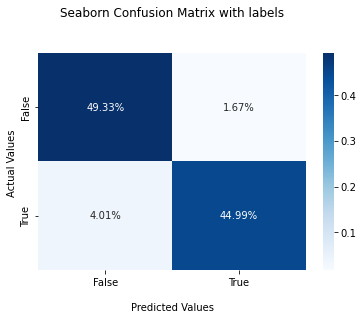

In [78]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(x_train)

classifier = MultinomialNB()

classifier.fit(counts,y_train)

examples = ['Handler Diagnoses Trump With a Disease', "she looks like jotaro in part 4 im crying"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
print(predictions)

counts_test = vectorizer.transform(x_test)
y_pred = classifier.predict(counts_test)



cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
from sklearn.metrics import accuracy_score
value = accuracy_score(y_test, y_pred)
print("The models accuracy is " + str(value*100))
print(cm)


import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()